<a href="https://colab.research.google.com/github/Rakshithadhandre/Brain_Tumor_Detection/blob/main/BrainTumor_Detection_all_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/BrainTumor_Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/BrainTumor_Dataset/Testing/glioma_tumor/gg (1).jpg
/content/drive/MyDrive/BrainTumor_Dataset/Testing/glioma_tumor/gg (10).jpg
/content/drive/MyDrive/BrainTumor_Dataset/Testing/glioma_tumor/gg (11).jpg
/content/drive/MyDrive/BrainTumor_Dataset/Testing/glioma_tumor/gg (12).jpg
/content/drive/MyDrive/BrainTumor_Dataset/Testing/glioma_tumor/gg (14).jpg
/content/drive/MyDrive/BrainTumor_Dataset/Testing/glioma_tumor/gg (13).jpg
/content/drive/MyDrive/BrainTumor_Dataset/Testing/glioma_tumor/gg (16).jpg
/content/drive/MyDrive/BrainTumor_Dataset/Testing/glioma_tumor/gg (15).jpg
/content/drive/MyDrive/BrainTumor_Dataset/Testing/glioma_tumor/gg (17).jpg
/content/drive/MyDrive/BrainTumor_Dataset/Testing/glioma_tumor/gg (18).jpg
/content/drive/MyDrive/BrainTumor_Dataset/Testing/glioma_tumor/gg (20).jpg
/content/drive/MyDrive/BrainTumor_Dataset/Testing/glioma_tumor/gg (19).jpg
/content/drive/MyDrive/BrainTumor_Dataset/Testing/glioma_tumor/gg (2).jpg
/content/drive/MyDrive/Brai

In [ ]:
train_dir="/content/drive/MyDrive/BrainTumor_Dataset/Training"

In [ ]:
Classes = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

In [ ]:
#converting into numerials and resizing
import cv2
import numpy as np
train_data = []
img_size=64
def get_training_data():
    for label in  Classes:
        path=os.path.join(train_dir, label)
        class_num = Classes.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                train_data.append([resized_arr, class_num])
            except Exception as e:
                pass

In [ ]:
get_training_data()

In [ ]:
print(len(train_data))

2610


In [ ]:
for label in Classes:
    print(Classes.index(label))

0
1
2
3


In [ ]:
#appending the size of the image
x=[]
y=[]
for i,j in train_data:
  x.append(i)
  y.append(j)
x=np.array(x).reshape(-1,img_size, img_size,3)

In [ ]:
x.shape

(2610, 64, 64, 3)

In [ ]:
x=x/255.0

In [ ]:
y=np.array(y)

In [ ]:
y.shape
print(y)

[0 0 0 ... 3 3 3]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=True,test_size=0.3)

In [ ]:
print(x_train.shape)

(1827, 64, 64, 3)


In [ ]:
print(y_test)

[2 1 3 0 0 1 1 1 1 3 2 0 0 2 3 1 1 0 1 0 3 1 1 2 1 3 3 0 0 3 3 3 3 3 0 2 0
 1 3 0 1 3 3 1 3 0 0 0 0 1 1 3 2 3 0 1 0 0 3 0 3 1 0 0 0 2 1 2 1 1 0 3 3 3
 0 3 3 1 1 3 1 3 2 0 3 3 1 0 1 3 0 1 2 3 0 3 1 0 1 1 0 2 1 3 1 3 1 1 0 1 1
 1 0 0 1 3 3 0 1 2 1 3 1 3 2 3 2 2 3 3 0 0 3 2 2 1 2 1 3 3 2 2 2 2 0 1 1 3
 1 0 2 0 2 3 3 1 0 1 0 0 2 0 3 3 3 1 2 0 1 3 0 3 1 1 3 2 0 2 3 3 1 0 3 1 3
 3 1 1 3 3 0 3 0 1 2 0 1 1 3 3 3 0 3 2 0 3 3 0 0 2 1 1 2 1 1 2 0 0 1 3 0 0
 0 3 1 1 1 3 3 0 0 0 0 0 0 3 1 3 2 1 1 2 3 3 2 2 0 3 0 0 0 1 0 0 0 1 1 3 1
 1 3 3 3 1 3 0 0 3 0 2 0 3 0 3 0 2 1 1 0 0 0 3 3 0 1 3 1 2 1 0 3 0 3 0 3 0
 2 0 1 0 0 1 3 1 3 2 3 0 1 2 1 1 0 2 0 2 3 0 0 0 1 1 0 2 2 1 2 1 2 1 3 0 3
 3 3 3 2 3 1 0 2 1 0 3 2 2 1 3 2 1 1 2 0 3 3 1 2 3 0 3 1 3 0 1 0 1 3 1 0 1
 1 3 3 3 1 3 3 0 1 0 2 2 1 3 2 0 1 3 1 0 1 1 2 2 1 2 0 3 1 3 0 2 1 3 0 1 0
 1 2 0 0 1 2 0 3 0 3 2 0 0 1 2 1 1 2 1 2 3 1 1 1 1 0 3 1 0 0 3 3 3 1 3 2 1
 3 2 3 0 3 1 0 3 0 0 3 0 3 1 1 1 3 0 1 0 0 3 3 1 3 3 0 3 1 1 1 1 0 2 1 3 1
 3 0 1 0 1 0 2 0 1 3 3 3 

In [ ]:
from tensorflow.keras.utils import to_categorical
# Assuming y_train contains integer labels (0 to 6 for 7 classes)
y_train= to_categorical(y_train, num_classes=4)

In [ ]:
from tensorflow.keras.utils import to_categorical

# Assuming y_train contains integer labels (0 to 6 for 7 classes)
y_test= to_categorical(y_test, num_classes=4)

In [ ]:
print(x_train.shape,y_test.shape)

(1827, 64, 64, 3) (783, 4)


**Mobilenet**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import utils
import os
from keras.layers import Flatten, Dense
from keras.models import Model
from tensorflow.keras.utils import img_to_array,load_img
from keras.preprocessing.image import  ImageDataGenerator
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy
base_model = MobileNet( input_shape=(64,64,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)


x = Dense(units=4 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)
#model = Model(inputs=base_model.input, outputs=output_layer)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 32, 32, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 32, 32, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 32, 32, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 32, 32, 32)        128 

In [ ]:
mnet= model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
58/58 [==============================] - 12s 183ms/step - loss: 0.8860 - accuracy: 0.6897 - val_loss: 0.5512 - val_accuracy: 0.8020
Epoch 2/15
58/58 [==============================] - 10s 179ms/step - loss: 0.3951 - accuracy: 0.8506 - val_loss: 0.5128 - val_accuracy: 0.8072
Epoch 3/15
58/58 [==============================] - 7s 125ms/step - loss: 0.2476 - accuracy: 0.9124 - val_loss: 0.4872 - val_accuracy: 0.8340
Epoch 4/15
58/58 [==============================] - 10s 170ms/step - loss: 0.1939 - accuracy: 0.9288 - val_loss: 0.4577 - val_accuracy: 0.8352
Epoch 5/15
58/58 [==============================] - 8s 134ms/step - loss: 0.1510 - accuracy: 0.9518 - val_loss: 0.4492 - val_accuracy: 0.8416
Epoch 6/15
58/58 [==============================] - 10s 165ms/step - loss: 0.1193 - accuracy: 0.9661 - val_loss: 0.4693 - val_accuracy: 0.8352
Epoch 7/15
58/58 [==============================] - 11s 185ms/step - loss: 0.0917 - accuracy: 0.9792 - val_loss: 0.4697 - val_accuracy: 0.8416
E

In [ ]:
#Evaluate the model on your test data.
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

25/25 [==============================] - 4s 142ms/step - loss: 0.4901 - accuracy: 0.8531
Test accuracy: 85.31%


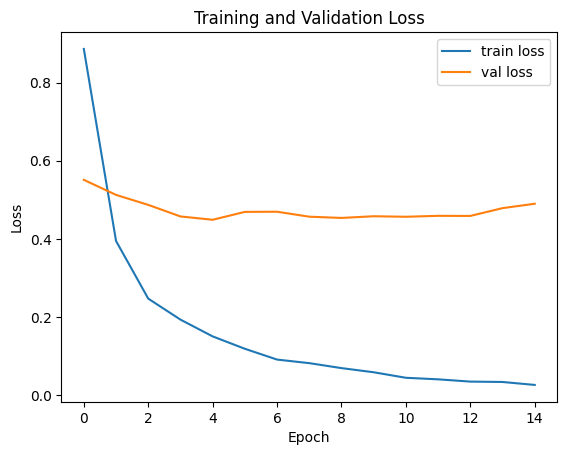

In [ ]:
# Plot the loss
import matplotlib.pyplot as plt
plt.plot(mnet.history['loss'], label='train loss')
plt.plot(mnet.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.savefig('LossVal_loss.png')
plt.show()

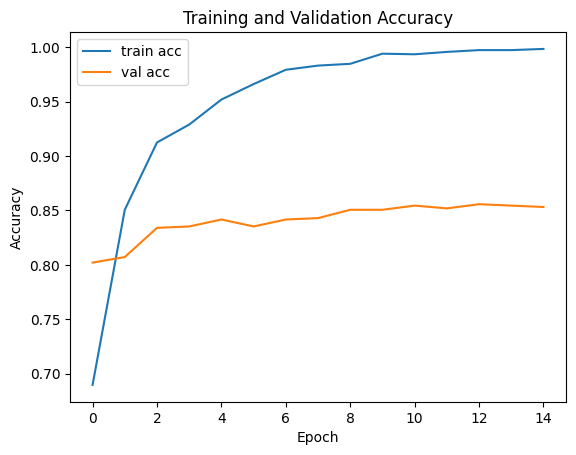

In [ ]:
# Plot the accuracy
plt.plot(mnet.history['accuracy'], label='train acc')
plt.plot(mnet.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.savefig('AccVal_acc.png')
plt.show()

**MOBILENET V2**

In [ ]:
#MobileNet V2
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']  )

In [ ]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 32, 32, 32)           864       ['input_8[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 32, 32, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 32, 32, 32)           0         ['bn_Conv1[0][0]']      

In [ ]:
mnet2= model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
58/58 [==============================] - 16s 221ms/step - loss: 0.9379 - accuracy: 0.6771 - val_loss: 0.5810 - val_accuracy: 0.7765
Epoch 2/15
58/58 [==============================] - 9s 162ms/step - loss: 0.3731 - accuracy: 0.8511 - val_loss: 0.5373 - val_accuracy: 0.7995
Epoch 3/15
58/58 [==============================] - 8s 132ms/step - loss: 0.2431 - accuracy: 0.9135 - val_loss: 0.5613 - val_accuracy: 0.8008
Epoch 4/15
58/58 [==============================] - 10s 167ms/step - loss: 0.1843 - accuracy: 0.9321 - val_loss: 0.4661 - val_accuracy: 0.8314
Epoch 5/15
58/58 [==============================] - 8s 137ms/step - loss: 0.1403 - accuracy: 0.9513 - val_loss: 0.5898 - val_accuracy: 0.8148
Epoch 6/15
58/58 [==============================] - 9s 152ms/step - loss: 0.1044 - accuracy: 0.9666 - val_loss: 0.5059 - val_accuracy: 0.8238
Epoch 7/15
58/58 [==============================] - 12s 206ms/step - loss: 0.0513 - accuracy: 0.9907 - val_loss: 0.5167 - val_accuracy: 0.8340
Epo

In [ ]:
#Evaluate the model on your test data.
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

25/25 [==============================] - 5s 194ms/step - loss: 0.5914 - accuracy: 0.8531
Test accuracy: 85.31%


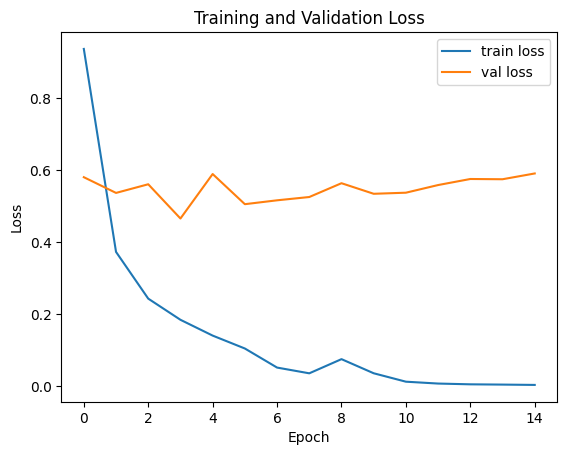

In [ ]:
# Plot the loss
import matplotlib.pyplot as plt
plt.plot(mnet2.history['loss'], label='train loss')
plt.plot(mnet2.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.savefig('LossVal_loss.png')
plt.show()

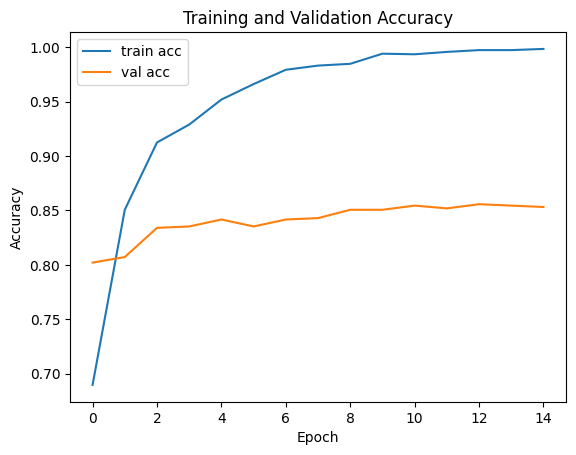

In [ ]:
# Plot the accuracy
plt.plot(mnet.history['accuracy'], label='train acc')
plt.plot(mnet.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.savefig('AccVal_acc.png')
plt.show()

**VGG19**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_size,img_size,3))

# Freeze the layers of the base VGG19 model
for layer in base_model.layers:
    layer.trainable = False

# Create your custom top layers for classification
x = layers.Flatten()(base_model.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(4, activation='softmax')(x)

# Create the new model with the VGG19 base and custom top
model = models.Model(inputs=base_model.input, outputs=output)

80134624/80134624 [==============================] - 4s 0us/step


In [ ]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [ ]:
model.compile(optimizer=optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

NameError: ignored

In [ ]:
vgg= model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
58/58 [==============================] - 36s 634ms/step - loss: 0.5631 - accuracy: 0.7789 - val_loss: 0.9037 - val_accuracy: 0.7139
Epoch 2/15
58/58 [==============================] - 35s 614ms/step - loss: 0.4330 - accuracy: 0.8363 - val_loss: 0.8980 - val_accuracy: 0.7165
Epoch 3/15
58/58 [==============================] - 44s 768ms/step - loss: 0.4543 - accuracy: 0.8265 - val_loss: 0.5724 - val_accuracy: 0.8123
Epoch 4/15
58/58 [==============================] - 43s 757ms/step - loss: 0.2500 - accuracy: 0.9042 - val_loss: 0.6114 - val_accuracy: 0.8033
Epoch 5/15
58/58 [==============================] - 43s 752ms/step - loss: 0.2937 - accuracy: 0.8911 - val_loss: 0.5179 - val_accuracy: 0.8352
Epoch 6/15
58/58 [==============================] - 44s 764ms/step - loss: 0.1787 - accuracy: 0.9338 - val_loss: 0.5459 - val_accuracy: 0.8250
Epoch 7/15
58/58 [==============================] - 33s 575ms/step - loss: 0.1842 - accuracy: 0.9272 - val_loss: 0.5978 - val_accuracy: 0.8250

In [ ]:
#Evaluate the model on your test data.
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

25/25 [==============================] - 11s 424ms/step - loss: 0.7042 - accuracy: 0.8327
Test accuracy: 83.27%


**Densenet**

In [ ]:
#DenseNet
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']  )

In [ ]:
dnsnet= model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
58/58 [==============================] - 58s 873ms/step - loss: 1.7895 - accuracy: 0.6136 - val_loss: 0.9185 - val_accuracy: 0.6628
Epoch 2/15
58/58 [==============================] - 44s 762ms/step - loss: 0.5650 - accuracy: 0.7800 - val_loss: 0.5404 - val_accuracy: 0.8020
Epoch 3/15
58/58 [==============================] - 43s 751ms/step - loss: 0.3920 - accuracy: 0.8435 - val_loss: 0.5030 - val_accuracy: 0.8212
Epoch 4/15
58/58 [==============================] - 43s 754ms/step - loss: 0.3072 - accuracy: 0.8911 - val_loss: 0.5478 - val_accuracy: 0.8135
Epoch 5/15
58/58 [==============================] - 38s 665ms/step - loss: 0.3013 - accuracy: 0.8872 - val_loss: 0.9109 - val_accuracy: 0.7305
Epoch 6/15
58/58 [==============================] - 35s 603ms/step - loss: 0.3117 - accuracy: 0.8768 - val_loss: 0.5422 - val_accuracy: 0.8123
Epoch 7/15
58/58 [==============================] - 43s 749ms/step - loss: 0.2791 - accuracy: 0.8845 - val_loss: 0.5041 - val_accuracy: 0.8442

In [ ]:
#Evaluate the model on your test data.
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

25/25 [==============================] - 9s 360ms/step - loss: 0.6349 - accuracy: 0.8442
Test accuracy: 84.42%


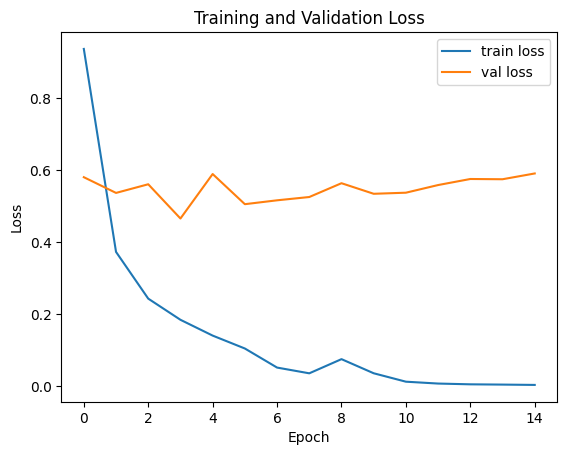

In [ ]:
# Plot the loss
import matplotlib.pyplot as plt
plt.plot(mnet2.history['loss'], label='train loss')
plt.plot(mnet2.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.savefig('LossVal_loss.png')
plt.show()

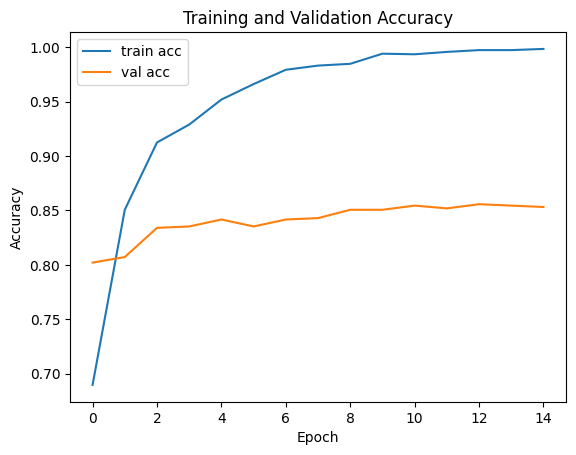

In [ ]:
# Plot the accuracy
plt.plot(mnet.history['accuracy'], label='train acc')
plt.plot(mnet.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.savefig('AccVal_acc.png')
plt.show()

**RESNET**

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False)
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
rnet= model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
58/58 [==============================] - 247s 4s/step - loss: 0.8467 - accuracy: 0.7203 - val_loss: 4.8379 - val_accuracy: 0.2822
Epoch 2/15
58/58 [==============================] - 219s 4s/step - loss: 0.4306 - accuracy: 0.8435 - val_loss: 9.6578 - val_accuracy: 0.1354
Epoch 3/15
58/58 [==============================] - 217s 4s/step - loss: 0.3049 - accuracy: 0.8966 - val_loss: 2.3473 - val_accuracy: 0.1354
Epoch 4/15
58/58 [==============================] - 216s 4s/step - loss: 0.2150 - accuracy: 0.9288 - val_loss: 3.5662 - val_accuracy: 0.1354
Epoch 5/15
58/58 [==============================] - 214s 4s/step - loss: 0.1281 - accuracy: 0.9535 - val_loss: 9.0523 - val_accuracy: 0.1354
Epoch 6/15
58/58 [==============================] - 213s 4s/step - loss: 0.1303 - accuracy: 0.9595 - val_loss: 7.2164 - val_accuracy: 0.1354
Epoch 7/15
58/58 [==============================] - 217s 4s/step - loss: 0.2106 - accuracy: 0.9310 - val_loss: 11.8209 - val_accuracy: 0.1354
Epoch 8/15
5

In [ ]:
#Evaluate the model on your test data.
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

25/25 [==============================] - 10s 399ms/step - loss: 3.5609 - accuracy: 0.3972
Test accuracy: 39.72%
